In [1]:
!wget -O house_prices.csv https://github.com/sathannan/DataScienceTraining/raw/master/house_prices.csv

--2019-04-07 07:42:26--  https://github.com/sathannan/DataScienceTraining/raw/master/house_prices.csv
Resolving github.com (github.com)... 192.30.253.112, 192.30.253.113
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sathannan/DataScienceTraining/master/house_prices.csv [following]
--2019-04-07 07:42:26--  https://raw.githubusercontent.com/sathannan/DataScienceTraining/master/house_prices.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 938020 (916K) [text/plain]
Saving to: ‘house_prices.csv’

100%[======================================>] 938,020     --.-K/s   in 0.03s   

2019-04-07 07:42:26 (27.6 MB/s) - ‘house_prices.csv’ saved [938020/938020]



In [404]:
import pandas as pd
#thislist=["--","na","NA","N/A","n/a","NaN","NAN","nan"]
#df = pd.read_csv("house_prices.csv",na_values=thislist)
df = pd.read_csv("house_prices.csv")
df = df.sort_values(by='price')

In [405]:
df.shape #gives no. of rows & columns in file

(13320, 9)

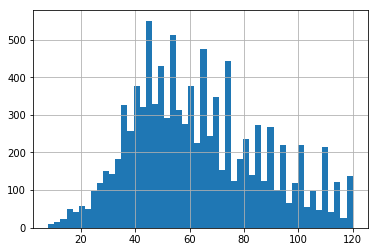

In [406]:
ploth = df['price'].head(10000)
ploth.hist(bins=50)

In [407]:
df.area_type.value_counts() #give count of values in specific columns

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [408]:
x=df.area_type.value_counts().keys().tolist()
y=df.area_type.value_counts().tolist()
#print(x)
#print(y)

<Container object of 4 artists>

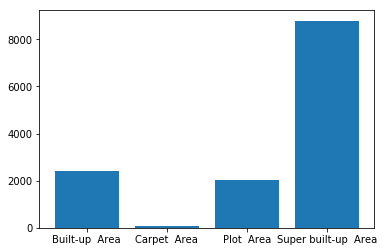

In [409]:
import matplotlib.pyplot as plt
plt.bar(x,y)

In [410]:
df.isnull().sum(axis=0) #Count of NaN values in each column, axis = 0 causes to do by columns

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [411]:
fix_area_type = {'Super built-up  Area':0, 'Built-up  Area':1, 'Plot  Area':2, 'Carpet  Area':3}
df['area_type'] = df.area_type.map(fix_area_type) #applies dictionary to all values in area_type column
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
10526,0,Ready To Move,Yelahanka New Town,1 BHK,KHatsFl,284,1.0,1.0,8.00
11569,2,Immediate Possession,Hosur Road,NaN,AVeldun,1350,NaN,NaN,8.44
8594,1,Ready To Move,Chandapura,1 BHK,NaN,450,1.0,1.0,9.00
5410,0,Ready To Move,Attibele,1 BHK,Jae 1hu,400,1.0,1.0,10.00
4113,0,18-Jan,BTM Layout,3 BHK,NaN,167Sq. Meter,3.0,2.0,10.00


In [412]:
def replace_availability(x):
    if x == "Ready To Move":
        return 0
    elif x == "Immediate Possession":
        return 1
    else:
        return 2

In [413]:
df['availability'] = df.availability.apply(replace_availability) #applies function to all values in availbility column
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
10526,0,0,Yelahanka New Town,1 BHK,KHatsFl,284,1.0,1.0,8.00
11569,2,1,Hosur Road,NaN,AVeldun,1350,NaN,NaN,8.44
8594,1,0,Chandapura,1 BHK,NaN,450,1.0,1.0,9.00
5410,0,0,Attibele,1 BHK,Jae 1hu,400,1.0,1.0,10.00
4113,0,2,BTM Layout,3 BHK,NaN,167Sq. Meter,3.0,2.0,10.00


In [414]:
import re
def area_conversion(data):
    try:
        return(float(data))
    except:
        area = ['Sq.Meter','Sq.Yards','Perch','Acres','Cents','Guntha','Grounds']
        conversion = [10.7639,9.0,272.25,43560,435.61545,1089.0,2400.0]
        x = re.split("(\d*.*\d)",data)
        area_type = x[2].strip()
        try:
            index_area = area.index(area_type)
            converted_value = float(x[1])*conversion[index_area]
            return converted_value
        except:
            return None            

In [415]:
val = area_conversion('284Guntha')
#print(val)

In [416]:
df['total_sqft'] = df.total_sqft.apply(area_conversion)

In [417]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
10526,0,0,Yelahanka New Town,1 BHK,KHatsFl,284.0,1.0,1.0,8.00
11569,2,1,Hosur Road,NaN,AVeldun,1350.0,NaN,NaN,8.44
8594,1,0,Chandapura,1 BHK,NaN,450.0,1.0,1.0,9.00
5410,0,0,Attibele,1 BHK,Jae 1hu,400.0,1.0,1.0,10.00
4113,0,2,BTM Layout,3 BHK,NaN,NaN,3.0,2.0,10.00


In [418]:
df = df.drop(columns="society",axis=1) #axis = 1 is for column & dropping specific column 
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
10526,0,0,Yelahanka New Town,1 BHK,284.0,1.0,1.0,8.00
11569,2,1,Hosur Road,NaN,1350.0,NaN,NaN,8.44
8594,1,0,Chandapura,1 BHK,450.0,1.0,1.0,9.00
5410,0,0,Attibele,1 BHK,400.0,1.0,1.0,10.00
4113,0,2,BTM Layout,3 BHK,NaN,3.0,2.0,10.00


In [419]:
df = df.dropna()

In [420]:
from sklearn.preprocessing import LabelEncoder
size_encoder = LabelEncoder()
size_encoder.fit(df['size'].astype('str'))
df['size'] = size_encoder.transform(df['size'].astype('str'))

In [421]:
size_encoder.classes_

array(['1 BHK', '1 Bedroom', '1 RK', '10 Bedroom', '11 BHK', '11 Bedroom',
       '12 Bedroom', '13 BHK', '14 BHK', '2 BHK', '2 Bedroom', '27 BHK',
       '3 BHK', '3 Bedroom', '4 BHK', '4 Bedroom', '43 Bedroom', '5 BHK',
       '5 Bedroom', '6 BHK', '6 Bedroom', '7 BHK', '7 Bedroom', '8 BHK',
       '8 Bedroom', '9 BHK', '9 Bedroom'], dtype=object)

In [422]:
df.head(8)

,area_type,availability,location,size,total_sqft,bath,balcony,price
10526,0,0,Yelahanka New Town,0,284.0,1.0,1.0,8.00
8594,1,0,Chandapura,0,450.0,1.0,1.0,9.00
5410,0,0,Attibele,0,400.0,1.0,1.0,10.00
1471,1,2,Kengeri,0,340.0,1.0,1.0,10.00
11091,1,0,Attibele,0,410.0,1.0,1.0,10.00
7482,0,0,Alur,0,470.0,2.0,1.0,10.00
12579,0,0,Chandapura,0,410.0,1.0,1.0,10.00
11945,0,0,Attibele,0,400.0,1.0,1.0,10.25


In [423]:
location_encoder = LabelEncoder()
location_encoder.fit(df['location'].astype('str'))
df['location'] = location_encoder.transform(df['location'].astype('str'))

In [424]:
location_encoder.classes_

array([' Anekal', ' Banaswadi', ' Basavangudi', ..., 'tc.palya',
       'vinayakanagar', 'whitefiled'], dtype=object)

In [425]:
df.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
10526,0,0,1222,0,284.0,1.0,1.0,8.0
8594,1,0,293,0,450.0,1.0,1.0,9.0
5410,0,0,146,0,400.0,1.0,1.0,10.0
1471,1,2,669,0,340.0,1.0,1.0,10.0
11091,1,0,146,0,410.0,1.0,1.0,10.0


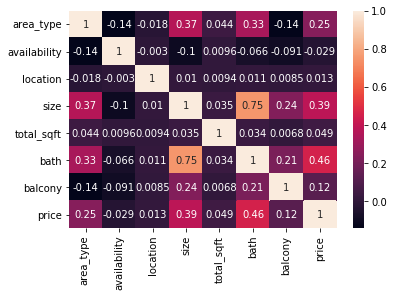

In [433]:
import seaborn as sns
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,cbar=True,annot=True) #annotations prints value inside squares & cbar is for right axis